In [1]:
import glob
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing as mp
import os
from build import build_model
import coralme

In [2]:
from IPython.display import display, HTML, Math, Markdown
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams['svg.fonttype'] = 'none'

### Load

In [4]:
from scipy.stats import zscore
def remove_outliers(series,cutoff = 1.5):
    Z = zscore(series)
    return series[Z[Z.abs()<cutoff].index]

In [5]:
ProcessedMetadata = pandas.read_csv("ibdmdb/processed_metadata.csv",index_col=0)

In [6]:
SongbirdDifferentials = pandas.read_csv("./datasets/SongbirdDifferentials_CovParticipant.tsv",sep="\t",index_col=0,header=0)

In [308]:
SongbirdDifferentials.to_csv("Supplementary File - Differentials.csv")

In [7]:
taxonomy = pandas.read_csv("./taxonomy.txt",index_col=0,sep='\t')
id_to_name = pandas.read_csv("taxonomy.txt",index_col=1,sep="\t")["MicrobeID"]

In [10]:
# SongbirdDifferentials.index = [id_to_name[i] for i in SongbirdDifferentials.index]

In [20]:
Diffs.groupby("Genus").mean().sort_values("diffs",ascending=False).loc[["Faecalibacterium","Bacteroides","Phocaeicola","Roseburia"]]

/tmp/ipykernel_2710878/2331531533.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Diffs.groupby("Genus").mean().sort_values("diffs",ascending=False).loc[["Faecalibacterium","Bacteroides","Phocaeicola","Roseburia"]]


,diffs,rank,NCBI Taxonomy ID
Genus,,,
Faecalibacterium,1.698910,484.50,579854.500
Bacteroides,0.577859,364.95,544484.225
Phocaeicola,0.643715,403.40,484002.400
Roseburia,0.388431,377.00,536231.000


In [11]:
metaG =  pandas.read_csv("./ibdmdb/metaG_aligned/samfiles/Custom_index_counts.tsv", sep ='\t',index_col=0).fillna(0.)

metaG.columns = [i.split("_")[0] for i in metaG.columns]
metaG.index = [id_to_name[i] for i in metaG.index]

### Load diffs

In [9]:
diffs = SongbirdDifferentials["numeric.1"]
candidates = diffs.abs().sort_values().index.to_list()
# print("Best organisms as reference are:\n{}".format(candidates))

In [10]:
Diffs = pandas.DataFrame()
Diffs["diffs"] = diffs.sort_values()
Diffs["rank"] = range(1,len(diffs)+1)
Diffs = pandas.concat([Diffs,taxonomy],axis=1)
Diffs = Diffs.dropna()

In [248]:
ref = "Bacteroides_sp_20_3"
# ref = "Pseudomonas_aeruginosa_NCGM2_S1"

Text(0.5, 0, 'Feature rankings')

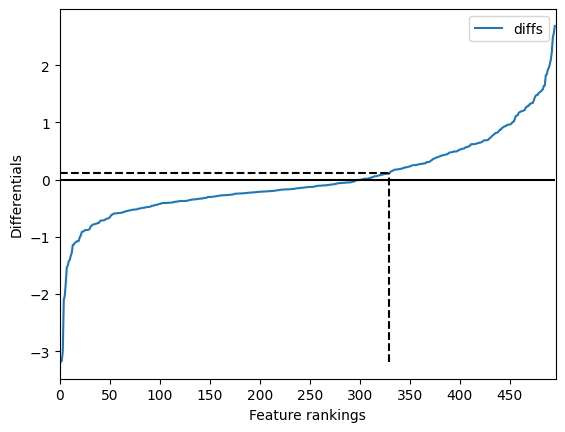

In [249]:
Diffs.plot(x="rank",y="diffs")
plt.hlines(y=0,xmin=0,xmax=495,linestyle='-',color='k')
plt.hlines(y=Diffs["diffs"][ref],xmin=0,xmax=Diffs["rank"][ref],linestyle='--',color='k')
plt.vlines(x=Diffs["rank"][ref],ymin=Diffs["diffs"].min(),ymax=Diffs["diffs"][ref],linestyle='--',color='k')
plt.xlim([0,496])
plt.xticks(range(0,495,50))
plt.ylabel("Differentials")
plt.xlabel("Feature rankings")

In [223]:
def plot_lines(taxa,color):
    plt.vlines(x=Diffs[Diffs["Genus"] == taxa]["rank"],
           ymin=0,
           ymax = Diffs[Diffs["Genus"] == taxa]["diffs"],
           color = color,
           alpha=alpha,
           linewidth = linewidth,
           label = taxa)

/tmp/ipykernel_7677/691874073.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  taxa = Diffs.groupby("Genus").mean().sort_values("diffs",ascending=True).head(4).index
/tmp/ipykernel_7677/691874073.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  taxa = Diffs.groupby("Genus").mean().sort_values("diffs",ascending=False).head(4).index


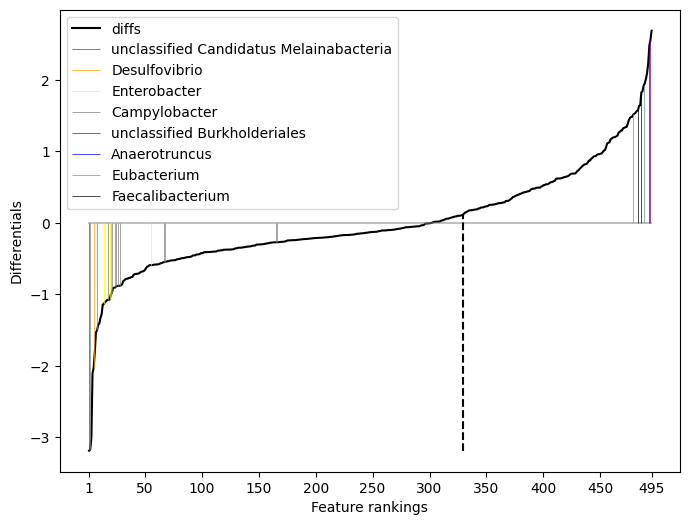

In [289]:
Diffs.plot(x="rank",y="diffs",color='k',figsize=(8,6))
plt.hlines(y=0,xmin=0,xmax=495,linestyle='-',color='gray',alpha=0.5)
# plt.hlines(y=Diffs["diffs"]["Pseudomonas_aeruginosa_NCGM2_S1"],xmin=0,xmax=Diffs["rank"]["Pseudomonas_aeruginosa_NCGM2_S1"],linestyle='--',color='k')
plt.vlines(x=Diffs["rank"][ref],ymin=Diffs["diffs"].min(),ymax=Diffs["diffs"][ref],linestyle='--',color='k')
# plt.xlim([0,496])
plt.xticks([1] + list(range(50,495,50)) + [495])
linewidth = 0.5
alpha = 1

taxa = Diffs.groupby("Genus").mean().sort_values("diffs",ascending=True).head(4).index
colors = ["red","orange","yellow","gray"]
for t,c in zip(taxa,colors):
    plot_lines(t,c)

taxa = Diffs.groupby("Genus").mean().sort_values("diffs",ascending=False).head(4).index
colors = ["purple","blue","cadetblue","black"]
for t,c in zip(taxa,colors):
    plot_lines(t,c)

plt.ylabel("Differentials")
plt.xlabel("Feature rankings")
plt.legend()
plt.savefig("./figures/3.6.1.RankPlot.svg",format="SVG")

In [255]:
Diffs.sort_values("diffs",ascending=True).head(10)

,diffs,rank,NCBI Taxonomy ID,Strain,Species,Genus,Family,Order,Class,Phylum,Kingdom
Melainabacterium_MEL_A1,-3.184991,1.0,1899017,Candidatus Melainabacteria bacterium MEL.A1,Candidatus Melainabacterium,unclassified Candidatus Melainabacteria,unclassified Candidatus Melainabacteria,unclassified Candidatus Melainabacteria,unclassified Candidatus Melainabacteria,Candidatus Melainabacteria,Bacteria
Campylobacter_gracilis_RM3268,-3.166469,2.0,553220,Campylobacter gracilis RM3268,Campylobacter gracilis,Campylobacter,Campylobacteraceae,Campylobacterales,Epsilonproteobacteria,Proteobacteria,Bacteria
Prevotella_buccae_ATCC_33574,-3.007611,3.0,873513,Prevotella buccae ATCC 33574,Prevotella buccae,Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
Fusobacterium_nucleatum_subsp_animalis_D11,-2.103818,4.0,556264,Fusobacterium nucleatum subsp. animalis D11,Fusobacterium nucleatum,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteriia,Fusobacteria,Bacteria
Desulfovibrio_piger_ATCC_29098,-2.028226,5.0,411464,Desulfovibrio piger ATCC 29098,Desulfovibrio piger,Desulfovibrio,Desulfovibrionaceae,Desulfovibrionales,Deltaproteobacteria,Proteobacteria,Bacteria
Fusobacterium_nucleatum_subsp_animalis_3_1_33,-1.808889,6.0,469603,Fusobacterium nucleatum subsp. animalis 3_1_33,Fusobacterium nucleatum,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteriia,Fusobacteria,Bacteria
Fusobacterium_sp_4_8,-1.533564,7.0,469607,Fusobacterium nucleatum subsp. animalis 4_8,Fusobacterium nucleatum,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteriia,Fusobacteria,Bacteria
Campylobacter_concisus_13826,-1.500285,8.0,360104,Campylobacter concisus 13826,Campylobacter concisus,Campylobacter,Campylobacteraceae,Campylobacterales,Epsilonproteobacteria,Proteobacteria,Bacteria
Fusobacterium_nucleatum_subsp_vincentii_4_1_13,-1.426835,9.0,469606,Fusobacterium nucleatum subsp. vincentii 4_1_13,Fusobacterium nucleatum,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteriia,Fusobacteria,Bacteria
Bacteroides_sp_3_1_19,-1.403037,10.0,469592,Bacteroides sp. 3_1_19,Bacteroides sp. 3_1_19,Bacteroides,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria


In [256]:
Diffs.groupby("Genus").mean().sort_values("diffs",ascending=True).head(10)

/tmp/ipykernel_7677/4258139642.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Diffs.groupby("Genus").mean().sort_values("diffs",ascending=True).head(10)


,diffs,rank,NCBI Taxonomy ID
Genus,,,
unclassified Candidatus Melainabacteria,-3.184991,1.000000,1.899017e+06
Desulfovibrio,-1.516636,12.500000,4.344310e+05
Enterobacter,-0.932400,29.333333,7.290027e+05
Campylobacter,-0.915855,70.461538,5.322727e+05
Holdemania,-0.879184,27.000000,5.456960e+05
Fusobacterium,-0.811735,82.600000,5.342631e+05
Ureaplasma,-0.797888,47.000000,5.708515e+05
Cryptobacterium,-0.778379,35.000000,4.693780e+05
Weissella,-0.768331,37.000000,9.111040e+05


In [258]:
Diffs.groupby("Genus").mean().sort_values("diffs",ascending=False).head(10)

/tmp/ipykernel_7677/3669219144.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Diffs.groupby("Genus").mean().sort_values("diffs",ascending=False).head(10)


,diffs,rank,NCBI Taxonomy ID
Genus,,,
unclassified Burkholderiales,2.558841,494.0,469610.0
Anaerotruncus,2.475346,493.0,445972.0
Eubacterium,1.717419,483.5,657638.5
Faecalibacterium,1.698910,484.5,579854.5
Hungatella,1.323214,470.0,999412.0
Bilophila,1.289959,468.0,563192.0
Eikenella,1.197712,462.0,546274.0
Dialister,1.173963,459.5,667385.5
Coprococcus,1.167910,458.5,440810.0


In [228]:
Diffs[Diffs["diffs"]>0]["Genus"].value_counts().head(3)

Bacteroides        31
Bifidobacterium    17
Streptococcus      16
Name: Genus, dtype: int64

### Choosing best reference

In [230]:
non = list(set(ProcessedMetadata[ProcessedMetadata["diagnosis"] == "nonIBD"]["metaG_run"].values))
ibd = list(set(ProcessedMetadata[ProcessedMetadata["diagnosis"] != "nonIBD"]["metaG_run"].values))

In [231]:
Znon = zscore(metaG[[i for i in metaG.columns if i in non]],axis=1)
Zibd = zscore(metaG[[i for i in metaG.columns if i in ibd]],axis=1)

In [232]:
AvgIBD = []
for org in candidates:
    samples = [i for i,b in (Zibd.loc[org].abs() < 100).items() if b]
    AvgIBD.append(metaG.loc[org][samples].mean())

In [233]:
AvgNON = []
for org in candidates:
    samples = [i for i,b in (Znon.loc[org].abs() < 100).items() if b]
    AvgNON.append(metaG.loc[org][samples].mean())

In [234]:
Summary = pandas.DataFrame([
                # AvgIBD,
                  # AvgNON,
                  diffs.loc[candidates],
                metaG.loc[candidates].all(axis=1)]
                      ).T
Summary.columns = ["Diff","All"]
Summary["nonIBD"] = AvgNON
Summary["IBD"] = AvgIBD

Summary = Summary[(Summary["All"] == 1.0)]
Summary["Fold"] = Summary["IBD"] / Summary["nonIBD"]
# tmp["Avg"] = tmp[["IBD","nonIBD"]].mean(axis=1)
Summary["Avg"] = metaG.mean(axis=1)
Summary["log10Avg"] = numpy.log10(metaG.mean(axis=1))
Summary["RelAbAvg"] = metaG.div(metaG.sum()).mean(axis=1)
Summary["Rank"] = range(1,Summary.shape[0]+1)

In [235]:
vals = []
for i in Summary.index:
    RefAb = metaG.div(metaG.loc[i])
    vals.append(RefAb[ibd].sum().mean() / RefAb[non].sum().mean())
Summary["Ratios"] = vals

In [236]:
print("Average is:10^{}".format(numpy.log10(metaG.mean(axis=1).mean())))

Average is:10^4.5906686318185255


Text(0.5, 0, 'Rank')

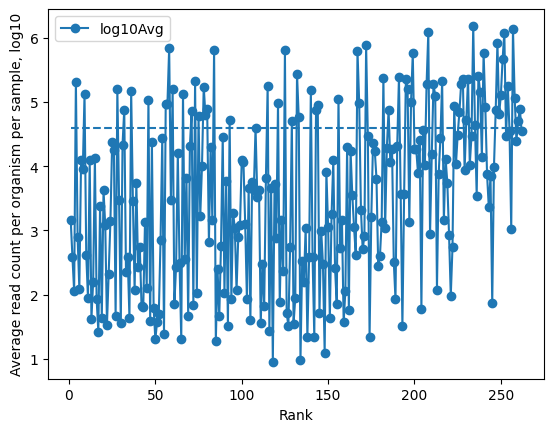

In [237]:
n = Summary.shape[0]
Summary[(Summary["All"] == 1.0) & (Summary["Rank"] <= n)].abs().sort_values("Rank",ascending=False).plot(x="Rank",y="log10Avg",marker="o")
plt.hlines(y = numpy.log10(metaG.mean(axis=1).mean()), xmin = 1, xmax = n, linestyle = "--")
plt.ylabel("Average read count per organism per sample, log10")
plt.xlabel("Rank")

Text(0.5, 0, 'Rank')

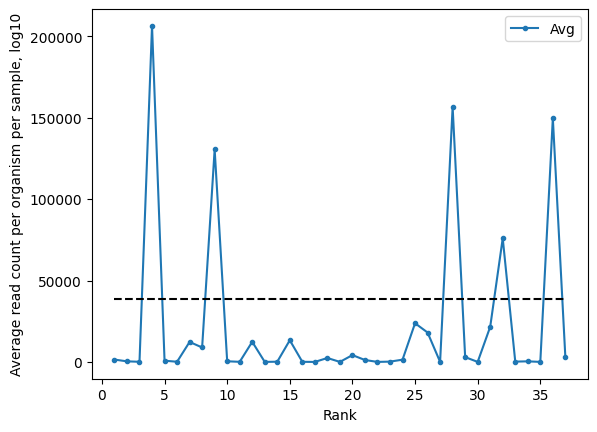

In [291]:
n = Summary.shape[0]
n = 37
Summary[(Summary["All"] == 1.0) & (Summary["Rank"] <= n)].abs().sort_values("Rank",ascending=False).plot(x="Rank",y="Avg",marker="o",markersize=3)
plt.hlines(y = metaG.mean(axis=1).mean(), xmin = 1, xmax = n, linestyle = "--", color = "k")
plt.ylabel("Average read count per organism per sample, log10")
plt.xlabel("Rank")

In [241]:
lst = Summary[(Summary["All"] == 1.0) & (Summary["Rank"] <= 50)].sort_values("Avg",ascending=False)
lst

,Diff,All,nonIBD,IBD,Fold,Avg,log10Avg,RelAbAvg,Rank,Ratios
Bacteroides_thetaiotaomicron_VPI_5482,0.007910,1.0,165500.909091,213054.343284,1.287330,206348.089744,5.314600,0.008700,4,8.546484
Bacteroides_intestinalis_341_DSM_17393,-0.092743,1.0,39490.909091,175813.776119,4.452006,156588.756410,5.194761,0.007882,28,13.443910
Bacteroides_sp_20_3,0.110605,1.0,70664.909091,162673.000000,2.302034,149697.500000,5.175215,0.007783,36,0.576074
Parabacteroides_distasonis_ATCC_8503,0.016637,1.0,81484.363636,138521.044776,1.699971,130477.410256,5.115535,0.007698,9,8.097802
Bacteroides_coprocola_M16_DSM_17136,0.157458,1.0,116528.454545,106390.223881,0.912998,107819.974359,5.032699,0.005844,46,14.228185
Bacteroides_sp_2_1_33B,-0.100833,1.0,30192.181818,83461.940299,2.764356,75949.538462,4.880525,0.004221,32,0.981243
Klebsiella_pneumoniae_pneumoniae_MGH78578,-0.085513,1.0,2760.727273,27224.671642,9.861413,23774.628205,4.376114,0.001116,25,1.343208
Bacteroides_nordii_CL02T12C05,0.165009,1.0,27814.545455,22940.104478,0.824752,23627.525641,4.373418,0.001257,48,0.727838
Dorea_formicigenerans_ATCC_27755,0.098984,1.0,26529.363636,20769.000000,0.782868,21581.358974,4.334079,0.001270,31,2.543101
Clostridiales_sp_1_7_47FAA,0.088002,1.0,16629.545455,18316.582090,1.101448,18078.666667,4.257166,0.001082,26,1.758593


In [151]:
ref = "Bacteroides_sp_20_3"
lst.loc[[ref]]

,Diff,All,nonIBD,IBD,Fold,Avg,log10Avg,RelAbAvg,Rank,Ratios
Bacteroides_sp_20_3,0.110605,1.0,70664.909091,162673.0,2.302034,149697.5,5.175215,0.007783,36,0.576074


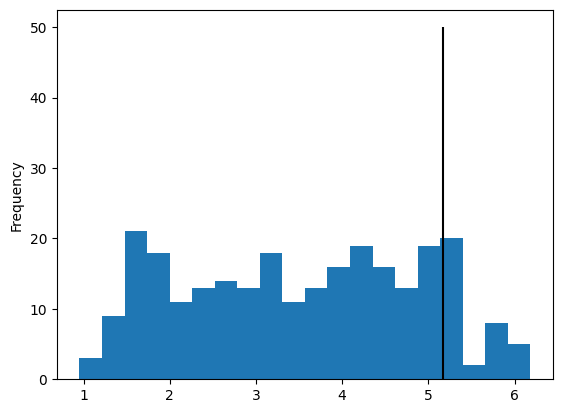

In [154]:
numpy.log10(Summary["Avg"]).plot.hist(bins = 20)
plt.vlines(x = numpy.log10(Summary["Avg"][ref]), ymin = 0, ymax = 50, color = "k")

In [155]:
numpy.log10(Summary["Avg"].min()),numpy.log10(Summary["Avg"].max())

(0.952382573055201, 6.183016725398284)

In [156]:
for i in range(0,100):
    p = numpy.percentile(Summary["Avg"].values.flatten(),i)
    if p > Summary["Avg"][ref]:
        break
print(i-1)

87


In [157]:
for i in range(0,100):
    p = numpy.percentile(Summary["Diff"].values.flatten(),i)
    if p > Summary["Diff"][ref]:
        break
print(i-1)

50


In [278]:
numpy.log10(Summary[(Summary["Diff"].abs()<abs(Summary["Diff"][ref])) & (Summary["log10Avg"].abs()<5.11)]["Avg"].mean())

3.8028603859267567

### Re-scaling abundances

In [182]:
lst.sort_values("Ratios")

,Diff,All,nonIBD,IBD,Fold,Avg,log10Avg,RelAbAvg,Rank,Ratios
Edwardsiella_tarda_ATCC_23685,-0.106164,1.0,27.727273,46.447761,1.675165,43.807692,1.641550,0.000003,35,0.561632
Bacteroides_sp_20_3,0.110605,1.0,70664.909091,162673.000000,2.302034,149697.500000,5.175215,0.007783,36,0.576074
Bacteroides_nordii_CL02T12C05,0.165009,1.0,27814.545455,22940.104478,0.824752,23627.525641,4.373418,0.001257,48,0.727838
Aeromonas_veronii_B565,-0.148796,1.0,33.454545,141.029851,4.215566,125.858974,2.099884,0.000006,45,0.853845
Kocuria_rhizophila_DC2201,-0.055683,1.0,26.000000,26.671642,1.025832,26.576923,1.424505,0.000002,17,0.953795
Bacteroides_sp_2_1_33B,-0.100833,1.0,30192.181818,83461.940299,2.764356,75949.538462,4.880525,0.004221,32,0.981243
Delftia_acidovorans_SPH_1,-0.006224,1.0,81.272727,117.492537,1.445658,112.384615,2.050707,0.000009,3,1.010186
Stenotrophomonas_maltophilia_D457,-0.091541,1.0,32.454545,48.611940,1.497847,46.333333,1.665894,0.000003,27,1.024360
Yersinia_enterocolitica_subsp_enterocolitica_8081,-0.053883,1.0,48.454545,92.044776,1.899611,85.897436,1.933980,0.000006,16,1.039460
Gemella_sanguinis_M325,-0.005567,1.0,139.545455,426.268657,3.054694,385.833333,2.586400,0.000018,2,1.067390


In [300]:
ref = "Bacteroides_sp_20_3"

In [301]:
ReferencedAbundances = metaG.div(metaG.loc[ref])

In [303]:
MeanAbundances = pandas.DataFrame()
for c,v in zip(["nonIBD","IBD"],[non,ibd]):
    MeanAbundances[c] = ReferencedAbundances[v].mean(axis=1).sort_values(ascending=False)
MeanAbundances.head()

,nonIBD,IBD
Bacteroides_vulgatus_ATCC_8482,93.804907,17.968731
Faecalibacterium_cf_prausnitzii_KLE1255,84.406506,10.644943
Bacteroides_sp_3_1_40A,68.403091,14.843391
Bacteroides_sp_4_3_47FAA,65.584305,14.770892
Prevotella_copri_CB7_DSM_18205,33.181741,27.439434


In [304]:
MeanAbundances.to_csv("ibdmdb/Referenced_metaG_per_diagnosis.csv")

In [305]:
AnnotatedAbundances = pandas.concat([MeanAbundances,taxonomy],axis=1).dropna()

In [306]:
AbundanceByTaxa = AnnotatedAbundances.groupby("Genus").sum().drop("NCBI Taxonomy ID",axis=1)
RelAb = AbundanceByTaxa.div(AbundanceByTaxa.sum())
SimplifiedAbundance = AbundanceByTaxa.loc[[i for i in RelAb[(RelAb>0.01).any(axis=1)].index]]
OthersAbundance = AbundanceByTaxa.loc[[i for i in RelAb[(RelAb<=0.01).any(axis=1)].index]]
SimplifiedAbundance = pandas.concat([SimplifiedAbundance,OthersAbundance.sum().to_frame().T],axis=0)

/tmp/ipykernel_7677/259892113.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AbundanceByTaxa = AnnotatedAbundances.groupby("Genus").sum().drop("NCBI Taxonomy ID",axis=1)


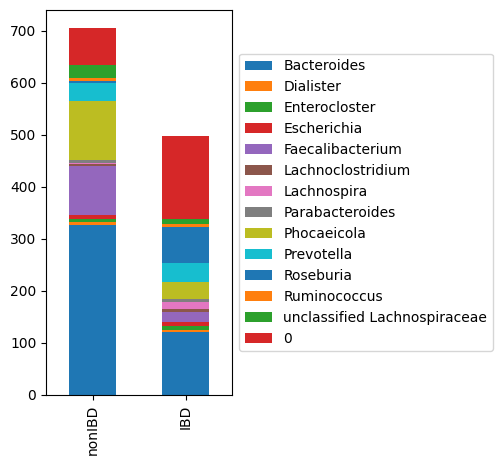

In [307]:
fig,ax = plt.subplots(1,1)
SimplifiedAbundance.T.plot(kind='bar', stacked=True, legend=True,figsize = (3,5),ax=ax)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylim([0,1])
# plt.savefig("./figures/3.6.2.GenusRelativeAbundances.svg",format="SVG")

In [193]:
AbundanceByTaxa.loc["Butyricimonas"]

nonIBD     4.991820
IBD       19.192219
Name: Butyricimonas, dtype: float64